# KRATKO POROČILO

In [54]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt

In [59]:
podatki = pd.read_csv(os.path.join('GospodinjskiOdjemalci.csv'), sep=';')
podatki["DateTimeStartCET"] = podatki["DateTimeStartCET"].apply(pd.to_datetime)
podatki

,DateTimeStartUTC,DateTimeStartCET,Odjem ACT,Temperatura ACT,Temperatura FC,Sevanje ACT,Sevanje FC
0,31.10.2021 23:00,2021-01-11 00:00:00,0.000010,3.60,5.300,0.0,0.0
1,31.10.2021 23:15,2021-01-11 00:15:00,0.000009,3.60,5.300,0.0,0.0
2,31.10.2021 23:30,2021-01-11 00:30:00,0.000009,3.60,5.300,0.0,0.0
3,31.10.2021 23:45,2021-01-11 00:45:00,0.000009,3.60,5.300,0.0,0.0
4,1.11.2021 00:00,2021-01-11 01:00:00,0.000008,3.45,5.300,0.0,0.0
...,...,...,...,...,...,...,...
81691,29.02.2024 21:45,2024-02-29 22:45:00,0.000012,6.80,7.475,0.0,0.0
81692,29.02.2024 22:00,2024-02-29 23:00:00,0.000011,6.65,7.300,0.0,0.0
81693,29.02.2024 22:15,2024-02-29 23:15:00,0.000011,6.50,7.300,0.0,0.0
81694,29.02.2024 22:30,2024-02-29 23:30:00,0.000010,6.50,7.300,0.0,0.0


In [60]:
podatki['Year'] = podatki['DateTimeStartCET'].dt.year.astype(int)
podatki['Dan'] = podatki['DateTimeStartCET'].dt.date
podatki = podatki.sort_values(by=['DateTimeStartCET'])

In [61]:
# vsota po dnevih, da bo graf malo bolj normalen:
podatki_vsota_po_dnevih = podatki.groupby(['Dan', 'Year']).mean().reset_index()
podatki_vsota_po_dnevih = podatki_vsota_po_dnevih.sort_values(by=['Dan'])
podatki_vsota_po_dnevih

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_68320\454263077.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  podatki_vsota_po_dnevih = podatki.groupby(['Dan', 'Year']).mean().reset_index()


,Dan,Year,Odjem ACT,Temperatura ACT,Temperatura FC,Sevanje ACT,Sevanje FC
0,2021-01-11,2021,0.000014,9.351042,9.907292,75.765625,110.220833
1,2021-01-12,2021,0.000014,5.957292,3.986979,34.895833,75.200000
2,2021-02-11,2021,0.000012,9.178646,8.272917,49.354167,93.512500
3,2021-02-12,2021,0.000015,4.207813,3.577083,7.687500,26.283333
4,2021-03-11,2021,0.000012,8.636979,8.039062,34.916667,60.550000
...,...,...,...,...,...,...,...
846,2024-10-02,2024,0.000013,11.580208,9.364063,49.812500,64.541667
847,2024-11-01,2024,0.000018,-4.567188,-6.046354,84.729167,76.433333
848,2024-11-02,2024,0.000014,9.510417,8.018750,36.500000,46.404167
849,2024-12-01,2024,0.000017,-2.824479,-4.892708,56.583333,74.912500


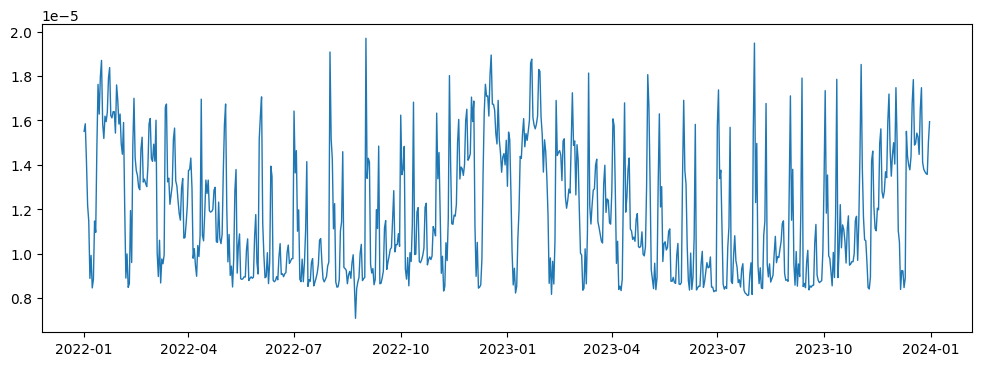

In [67]:
# plt.plot(podatki['DateTimeStartCET'], podatki['Odjem ACT'])
plt.rcParams['figure.figsize'] = [12, 4]
podatki_vsota_po_dnevih_2023_naprej = podatki_vsota_po_dnevih.loc[podatki_vsota_po_dnevih['Year'].isin([2022,2023])]
plt.plot(podatki_vsota_po_dnevih_2023_naprej['Dan'], podatki_vsota_po_dnevih_2023_naprej['Odjem ACT'], lw=1)

Opaziti je sezonskost: večji odjem v zimskih mesecih